In [34]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123641 sha256=a4aee6d94ea64233a0bf02f15eb54dd00ba97a8bcf2259af5e54f8462127ab96
  Stored in directory: /tmp/pip-ephem-wheel-cache-_kinxvar/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
nb_erdos = 7

In [4]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  14
Nb of segmented nodes :  14.0
Nb of links :  50
Nb of segmented links :  70.0
Nb of event times :  57


In [5]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


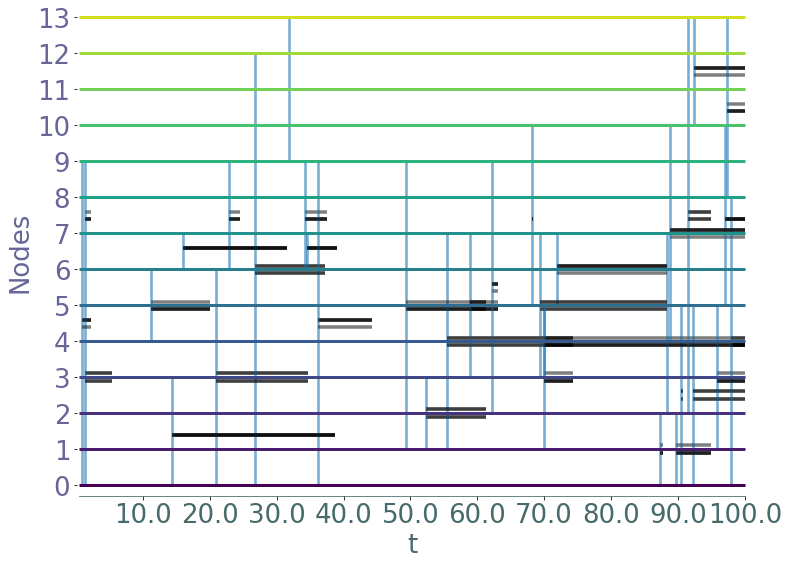

In [6]:
S.plot()

In [7]:
SS = S.stream_graph_to_link_stream()

In [8]:
SS.write_to_matthieu_link_stream("erdos" + str(nb_erdos))

In [20]:
#betweenness, general_contri, nouveau, events, sigma_r, latency, prev_next , contri, before, after, deltasvvt, no_succ ,features = bt.betweenness_all(SS)

In [19]:
#bt.simulations(SS, "papier")

In [11]:
bet_moi = bt.read_dictionary("papier_betweenness.pic")

In [12]:
import os
cmd = 'mv erdos'+str(nb_erdos)+'_mat.ls archive_code/Test'
os.system(cmd)

0

In [18]:
import os
#cmd = 'python2 archive_code/betweenness_all.py Test/erdos'+str(nb_erdos)+'_mat.ls -1 res'
#os.system(cmd)

In [14]:
bet_mat = bt.read_dictionary("res_betweenness.pic")

In [15]:
bet_mat.keys()

dict_keys(['10', '13', '12', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8'])

In [16]:
bet_moi.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

In [17]:
for v in bet_moi.keys():
    for t in bet_moi[v].keys():
        if (v.lower() in bet_mat ):
            if not (abs(bet_moi[v][t] - bet_mat[v.lower()][t]) < 1/100):
                print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])

In [30]:
#contribution check
node = 3

In [31]:
import os
cmd = 'python2 archive_code/betweenness_tout.py Test/erdos'+str(nb_erdos)+'_mat.ls -1 ' + S.node_to_label[node].lower() + " cont"
print (cmd)
os.system(cmd)

python2 archive_code/betweenness_tout.py Test/erdos7_mat.ls -1 3 cont
archive_code
('filename', 'cont')
10 0.468187  0
10 0.929773  0
10 1.34735  0
10 1.37453  0
10 2.27058  0
10 5.36665  0
10 11.1563  0
10 14.3036  0
10 15.9915  0
10 20.0254  0
10 20.8831  0
10 22.8245  0
10 24.51  0
10 26.8022  0
10 31.5807  0
10 31.8674  0
10 31.8764  0
10 34.2867  0
10 34.5292  0
10 34.7255  0
10 36.1484  0
10 37.2896  0
10 37.5143  0
10 38.7427  0
10 38.9649  0
10 44.245  0
10 49.3928  0
10 52.2813  0
10 55.417  0
10 58.8404  0
10 61.2883  0
10 62.1681  0
10 63.1333  0
10 68.1812  0
10 68.3077  0
10 69.4137  0
10 69.9391  0
10 70.002  0
10 71.9581  0
10 74.3766  0
10 87.3248  0
10 87.815  0
10 88.379  0
10 88.4322  0
10 88.8705  0
10 89.7499  0
10 90.505  0
10 90.8117  0
10 91.5101  0
10 92.2118  0
10 92.3774  0
10 94.9437  0
10 95.8115  0
10 97.1011  0
10 97.3705  0
10 98.007  0
10 100  0
10 100  0
13 0.468187  0
13 0.929773  0
13 1.34735  0
13 1.37453  0
13 2.27058  0
13 5.36665  0
13 11.1563  0

0

In [32]:
cont_mat = bt.read_dictionary("cont_contri.pic")

In [33]:
for v in general_contri[node].keys():
    for t in general_contri[node][v].keys():
        if S.node_to_label[v].lower() in cont_mat:
            if abs(general_contri[node][v][t].val - cont_mat[S.node_to_label[v].lower()][t]) > 1/100:
                print("erreur ",v,t,"=>   ", "(",general_contri[node][v][t].dim,general_contri[node][v][t].val,")" ,cont_mat[S.node_to_label[v].lower()][t])

erreur  0 90.8116749344082 =>    ( 0 0 ) 63.39300074473925
erreur  13 91.51014453612402 =>    ( 0 0 ) 63.39300074473925
erreur  5 90.8116749344082 =>    ( 0 0 ) 63.39300074473925
erreur  3 90.8116749344082 =>    ( 0 0 ) 63.39300074473925
erreur  2 91.51014453612402 =>    ( 0 0 ) 63.39300074473925


In [23]:
SS.write_to_sg("examples/erdos2")

In [126]:
SS.alpha

1.1308940848602123

In [127]:
SS.omega

100